# Многослойный перцептрон с помощью scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42) # fix rng


In [4]:
train_df = pd.read_csv('Day2_df.csv')
train_df = train_df.sample(frac = 1, random_state = 42) # shuffle data
# drop index
train_df = train_df.reset_index(drop = True)
# change to numeral values
train_df["Sex"] = train_df["Sex"].astype('category').cat.codes
train_df["IsAlone"] = train_df["IsAlone"].astype('category').cat.codes

train_df.head()

,Unnamed: 0,index,Longevity,Education,Sex,Age,Pet,Children,Activity,Sport,Family,IsAlone,Age_range,Social_status
0,647,814,0,3,0,74,0,0,805,0,0,1,3,9
1,336,421,0,3,0,73,0,0,773,0,0,1,3,9
2,63,83,0,1,0,74,0,0,4710,0,0,1,3,3
3,367,460,1,1,0,76,0,0,2655,0,0,1,4,4
4,101,129,0,3,0,76,0,0,698,0,0,1,4,12


Построить и применить модель Персепторона (Perceptron)

In [10]:
size = 400
# train dataset
#x_train = train_df[['Education', 'Sex', 'Age', 'Family', 'Activity', 'IsAlone', 'Social_status']][:size].values
#y_train = train_df['Longevity'][:size].values
# test dataset
#x_test = train_df[['Education', 'Sex', 'Age', 'Family', 'Activity', 'IsAlone', 'Social_status']][size:].values
#y_test = train_df['Longevity'][size:].values

# train dataset
x_train = train_df[['Education', 'Sex', 'Activity', 'IsAlone', 'Social_status']][:size].values
y_train = train_df['Longevity'][:size].values
# test dataset
x_test = train_df[['Education', 'Sex', 'Activity', 'IsAlone', 'Social_status']][size:].values
y_test = train_df['Longevity'][size:].values

print("train shape: X {} Y {}".format(x_train.shape, y_train.shape))
print("test  shape: X {} Y {}".format(x_test.shape, y_test.shape))

train shape: X (400, 5) Y (400,)
test  shape: X (279, 5) Y (279,)


Визуализация данных

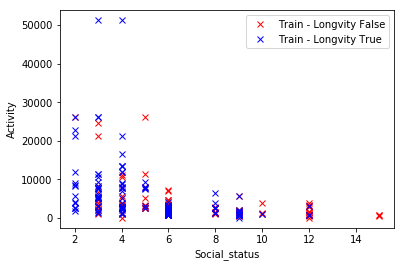

In [11]:
# set categories names as a list, take two indexes to plot
#cat_mas = ['Education', 'Sex', 'Age', 'Family', 'Activity', 'IsAlone', 'Social_status']
cat_mas = ['Sex', 'Activity', 'IsAlone', 'Social_status']
cat_one_index = cat_mas.index('Social_status')
cat_two_index = cat_mas.index('Activity')

plt.plot(x_train[y_train == 0][:, cat_one_index], x_train[y_train == 0][:, cat_two_index], 'rx', label = 'Train - Longvity False')
plt.plot(x_train[y_train == 1][:, cat_one_index], x_train[y_train == 1][:, cat_two_index], 'bx', label = 'Train - Longvity True')

plt.xlabel(cat_mas[cat_one_index])
plt.ylabel(cat_mas[cat_two_index])
plt.legend()
plt.show()


Создание и тренировка модели

In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:
model = MLPClassifier(random_state = 42)
model.fit(x_train, y_train)

print('Train score: {}'.format(model.score(x_train, y_train)))
print('Test  score: {}'.format(model.score(x_test,  y_test)))

Train score: 0.6875
Test  score: 0.6953405017921147
